<a href="https://colab.research.google.com/github/vmotta/Algebra-Linear-Python/blob/master/convolucional_mnist_estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot = False)

W0812 23:03:45.360208 139844782696320 deprecation.py:323] From <ipython-input-1-8a2d40bc1ba6>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0812 23:03:45.368276 139844782696320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0812 23:03:45.376206 139844782696320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz


W0812 23:03:51.026902 139844782696320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0812 23:03:51.125989 139844782696320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [0]:
X_treinamento = mnist.train.images
y_treinamento = mnist.train.labels
X_teste = mnist.test.images
y_teste = mnist.test.labels

In [0]:
y_treinamento = np.asarray(y_treinamento, dtype = np.int32)
y_teste = np.asarray(y_teste, dtype = np.int32)

In [4]:
X_treinamento.shape

(55000, 784)

In [5]:
X_teste.shape

(10000, 784)

In [6]:
X_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
y_treinamento

array([7, 3, 4, ..., 5, 6, 8], dtype=int32)

Text(0.5, 1.0, 'Classe: 4')

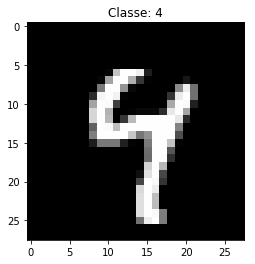

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_treinamento[2].reshape((28,28)), cmap = 'gray')
plt.title('Classe: ' + str(y_treinamento[2]))

In [0]:
import tensorflow as tf

In [0]:
def cria_rede(features, labels, mode):
    # batch_size, largura, altura, canais
    entrada = tf.reshape(features['X'], [-1, 28, 28, 1])
    
    # recebe [batch_size, 28, 28, 1]
    # retorna [batch_size, 28, 28, 32]
    convolucao1 = tf.layers.conv2d(inputs = entrada, filters = 32, kernel_size=[5,5], activation = tf.nn.relu,
                                  padding = 'same')
    # recebe [batch_size, 28, 28, 32]
    # retorna [batch_size, 14, 14, 32]
    pooling1 = tf.layers.max_pooling2d(inputs = convolucao1, pool_size = [2,2], strides = 2)
    
    # recebe [batch_size, 14, 14, 32]
    # retorna [batch_size, 14, 14, 64]
    convolucao2 = tf.layers.conv2d(inputs = pooling1, filters = 64, kernel_size = [5,5], activation = tf.nn.relu,
                                  padding = 'same')
    # recebe [batch_size, 14, 14, 64]
    # retorna [batch_size, 7, 7, 64]
    pooling2 = tf.layers.max_pooling2d(inputs = convolucao2, pool_size = [2,2], strides = 2)
    
    # recebe [batch_size, 7, 7, 64]
    # retornar [batch_size, 3136]
    flattening = tf.reshape(pooling2, [-1, 7 * 7 * 64])
    
    # 3136 (entradas) -> 1024 (oculta) -> 10 (saída)
    # recebe [batch_size, 3136]
    # retornar [batch_size, 1024]
    densa = tf.layers.dense(inputs = flattening, units = 1024, activation = tf.nn.relu)
    
    # dropout
    dropout = tf.layers.dropout(inputs = densa, rate = 0.2, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # recebe [batch_size, 1024]
    # retornar [batch_size, 10]
    saida = tf.layers.dense(inputs = dropout, units = 10)
    
    # 0.2 0.2 0.6 - 2
    previsoes = tf.argmax(saida, axis = 1)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, predictions = previsoes)
    
    erro = tf.losses.sparse_softmax_cross_entropy(labels = labels, logits = saida)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        otimizador = tf.train.AdamOptimizer(learning_rate = 0.001)
        treinamento = otimizador.minimize(erro, global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode = mode, loss = erro, train_op = treinamento)
    
    if mode == tf.estimator.ModeKeys.EVAL:
        eval_metrics_ops = {'accuracy': tf.metrics.accuracy(labels = labels, predictions = previsoes)}
        return tf.estimator.EstimatorSpec(mode = mode, loss = erro, eval_metric_ops = eval_metrics_ops)
    

In [11]:
classificador = tf.estimator.Estimator(model_fn = cria_rede)

W0812 23:03:51.964276 139844782696320 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpd0grwkqk


In [12]:
funcao_treinamento = tf.estimator.inputs.numpy_input_fn(x = {'X': X_treinamento}, y = y_treinamento,
                                                       batch_size = 128, num_epochs = None, shuffle = True)
classificador.train(input_fn=funcao_treinamento, steps = 200)

W0812 23:03:52.005038 139844782696320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0812 23:03:52.036827 139844782696320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0812 23:03:52.040852 139844782696320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_

In [13]:
funcao_teste = tf.estimator.inputs.numpy_input_fn(x = {'X': X_teste}, y = y_teste, num_epochs = 1,
                                                      shuffle = False)
resultados = classificador.evaluate(input_fn=funcao_teste)
resultados

W0812 23:05:06.693429 139844782696320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


{'accuracy': 0.9802, 'global_step': 200, 'loss': 0.061949965}

In [14]:
X_imagem_teste = X_teste[1]
X_imagem_teste.shape

(784,)

In [15]:
X_imagem_teste = X_imagem_teste.reshape(1,-1)
X_imagem_teste.shape

(1, 784)

In [0]:
funcao_previsao = tf.estimator.inputs.numpy_input_fn(x = {'X': X_imagem_teste}, shuffle = False)
pred = list(classificador.predict(input_fn = funcao_previsao))

In [17]:
pred[0]

2

Text(0.5, 1.0, 'Classe prevista: 2')

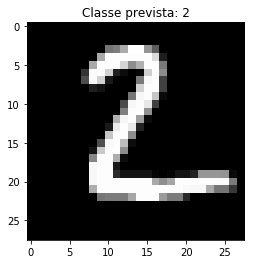

In [18]:
plt.imshow(X_imagem_teste.reshape((28, 28)), cmap = 'gray')
plt.title('Classe prevista: ' + str(pred[0]))